# Breast Control Experiment

Run 3 experiments:
- n-of-1 vs All Breast
- n-of-1 vs Breast Subset (~10 samples)
- n-of-1 vs Breast subset + all other tissues

Compare PPP and outlier values

# Inputs

In [1]:
import rnaseq_lib3 as r
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
# Read in centered data
df = pd.read_hdf('/mnt/data/Objects/tcga_gtex_tpm_norm_filt_centered.hd5')
# Subset
gtex = df[df.label == 'gtex']
normal = df[df.label == 'tcga-normal']
tumor = df[df.label == 'tcga-tumor']

Drug genes

In [6]:
drug_genes = [x.split('\t')[0] for x in open('../../data/druggable-genes.tsv', 'r').readlines()]
drug_genes = [x for x in drug_genes if x in df.columns]
len(drug_genes)

85

In [7]:
def plot_gene_dist(n_of_1, gene):
    plt.axvline(n_of_1[gene], label='n-of-1', color='red')
    sns.kdeplot(gtex[gene], label='gtex')
    sns.kdeplot(normal[gene], label='normal')
    sns.kdeplot(tumor[gene], label='tumor')    
    plt.title(gene);

# N-of-1 vs. All Breast

In [8]:
#n_of_1 = tumor.loc[np.random.choice(tumor[tumor.tissue == 'Breast'].id)]
n_of_1 = tumor.loc['TCGA-BH-A0DS-01']
breast = normal[normal.tissue == 'Breast']

In [9]:
genes = list(np.random.choice(drug_genes, 50, replace=False))

In [10]:
model_all, trace_all = r.outlier.train_outlier_model(sample=n_of_1,
                                                     background_df=breast,
                                                     class_col='tissue',
                                                     training_genes=genes)

Running 12 on as many cores (if >= 4)
Number of parameters in model: 153


Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (12 chains in 12 jobs)
NUTS: [sigma, RPTOR-Breast, STAT2-Breast, JAK1-Breast, AURKB-Breast, STAT5A-Breast, BRAF-Breast, CCND1-Breast, IL6R-Breast, PIK3CD-Breast, ALK-Breast, ERBB2-Breast, MTOR-Breast, PARP1-Breast, PDGFRB-Breast, PIK3R3-Breast, PIK3R5-Breast, AKT3-Breast, KIT-Breast, MDM2-Breast, FLT3-Breast, NTRK1-Breast, CCND2-Breast, BCL2-Breast, FGFR1-Breast, MET-Breast, PTCH1-Breast, CDK6-Breast, STAT3-Breast, CDK4-Breast, EGFR-Breast, MS4A1-Breast, HSP90AB1-Breast, CCND3-Breast, IL6-Breast, PIK3C3-Breast, FGFR3-Breast, TEK-Breast, ROS1-Breast, AURKA-Breast, PIK3C2A-Breast, PIK3C2B-Breast, STAT1-Breast, SMO-Breast, JAK2-Breast, TSC2-Breast, PIK3C2G-Breast, CDK2-Breast, NRAS-Breast, HRAS-Breast, KDR-Breast, beta, alpha]
Sampling 12 chains: 100%|██████████| 14400/14400 [01:13<00:00, 29.09draws/s] 


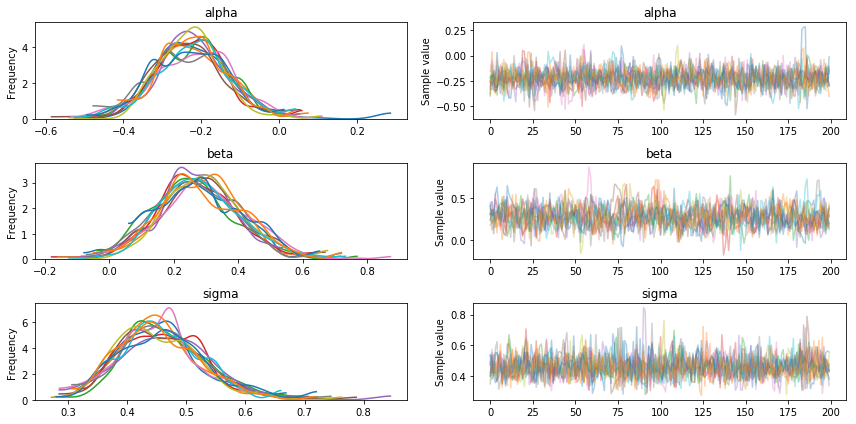

In [12]:
varnames = ['alpha', 'beta', 'sigma']
pm.traceplot(trace_all, varnames=varnames);

In [ ]:
plot_genes = ['JAK2', 'PARP1']
f, ax = plt.subplots(1, 2)
ax = ax.flatten()
for i, gene in enumerate(plot_genes):
    r.outlier.posterior_from_linear(trace_all, sample=n_of_1, gene=gene, 
                                    background_df=breast, class_col='tissue',
                                    ax=ax[i])

# N-of-1 vs. Breast Subset

In [14]:
random_breast = np.random.choice(breast.id, 10)
breast_sub = breast.loc[random_breast]

In [ ]:
model_sub, trace_sub = r.outlier.train_outlier_model(sample=n_of_1,
                                                     background_df=breast_sub,
                                                     class_col='tissue',
                                                     training_genes=genes)

Running 12 on as many cores (if >= 4)
Number of parameters in model: 153


Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


In [ ]:
pm.traceplot(trace_sub, varnames=varnames);

In [ ]:
plot_genes = ['JAK2', 'PARP1']
f, ax = plt.subplots(2)
for i, gene in enumerate(plot_genes):
    r.outlier.posterior_from_linear(trace_sub, sample=n_of_1, gene=gene, 
                                    background_df=breast_sub, 
                                    class_col='tissue', ax=ax[i])

# N-of-1 vs. Breast Subset + Other Tissues
